# 1 Matrices and Numpy

## 1.1 Matrices Theory

### 1.1.1 Properties of matrices

#### Consider A,B are two matrices 
- Addition(If A and B matrices of same order):
    - A + B  = C , where C is a matrix of same order
    - Commutative: A + B = B + A
    - Associative: (A+B)+C = A+(B+C)
    
- scalar multiplication(let k be a scalar and A and B are matrices of same order): 
    - k * A = kA
    - k(A+B) = kA + kB
    - if k and l are 2 scalars, (k+1)A = kA+ lA
- matrix multiplication:
    - Matrices in chain can olny be multiplied,if the coulmn dimensions of a matrix match the row dimensions of the following matrix in chain.
    - If matrix A is of order mxn and matrix B of order nxp, the product AB is equal to matric C of order mxp
    - Associative: A.(B.C) = (A.B).C
    - Distributive: A(B+C) = AB + AC
    - Not Commutative: A.B != B.A
    - Transpose: (AB)^T = B^T * A^T
- Transpose:
    - (A')' = A
    - (kA)' = kA'
    - (A+B)' = A' + B'
    - (AB)' = B' * A'

### 1.1.2 Python function to get a matrix from user

In [150]:
# get matrix dimensions
class PyMatrix:
    def __init__(self, rows=0, cols=0):
        self.rows = int(rows)
        self.cols = int(cols)
        
    def getMatrixDimensions(self):
        self.rows = int(input("Enter # of rows:"))
        self.cols = int(input("Enter # of columns"))
        
    def getMatrix(self):
        matrix = []
        for i in range (0,self.rows):
            temp = []
            for j in range (0,self.cols):
                temp.append(int(input()))
            matrix.append(temp)
        return matrix
        

### 1.1.3 Get two matrices from the user 

In [151]:
# get values for matrix A
obj_A = PyMatrix()
obj_A.getMatrixDimensions()
A = obj_A.getMatrix()
print("Matrix A:", A)

obj_B = PyMatrix()
obj_B.getMatrixDimensions()
B = obj_B.getMatrix()
print("Matrix B:", B)

Enter # of rows:3
Enter # of columns3
2
3
5
23
3
5
5
7
8
Matrix A: [[2, 3, 5], [23, 3, 5], [5, 7, 8]]
Enter # of rows:3
Enter # of columns3
1
2
3
4
5
6
7
8
9
Matrix B: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]


#### 1.2 Matrix manipulation without using Numpy

In [190]:
#functions

#multiplication
def matrixMultiplication(A,B):
    res = []
    if(type(A) != list and type(B) != list):
        # both are scalar
        return A*B
    elif(type(A) != list or type(B) != list):
        
        #either is scalar
        lst = A
        scalar = B
        if(type(A) != list):
            lst = B
            scalar = A
        # check for 1D or 2D
        flag_2d = False
        if(type(lst[0]) == list):
            flag_2d = True
        if(flag_2d):  
            for row in lst:
                temp = []
                for val in row:
                    temp.append(scalar * val)
                res.append(temp)
        else:
            for val in lst:
                res.append(scalar * val)
                
        return res
    elif(type(A) == list and type(A[0]) == list and type(B) == list and type(B[0]) == list):

        #perform checks
        A_row = len(A)
        A_col = len(A[0])

        B_row = len(B)
        B_col = len(B[0])
        
        #define result matrix
        result = [([0]*B_col) for i in range(A_row)]
        
        #if matrix is mxn and not compatible -> return message
        if(A_col != B_row):         
            return "Matrix multiplication is not possible as column of matrix A do not match row of B"
        #if matrix is mxn and compatible -> matrix multiplication
        else: 
            for i in range(0, A_row):
                for j in range(0, B_col):
                    for k in range(0, B_row):
                        result[i][j] += (A[i][k] * B[k][j])
            return result


# transpose
def transpose(A):
    res = []
    for i in range(0, len(A)):
        lst = []
        for j in range(0, len(A[0])):
            lst.append(A[j][i])
        res.append(lst)
    return res

#cofactor
def cofactor(A,i,j):
    res = []
    sub = A[:i]+A[i+1:] # remove row i
    for row in sub:
        res.append(row[:j]+row[j+1:]) #remove j
    return res
    
    
#determinant
def determinant(A):
    det = 0
    if(len(A) != len(A[0])):
        return "Determinant cannot be computed for non-square matrix"
    if(len(A) == 2):
        ad = A[0][0]*A[1][1]
        cb = A[0][1]*A[1][0]
        return (ad-cb)
    
    for col in range(0, len(A)):
        prefix = -1
        if(col == 0 or col % 2 == 0):
            prefix = 1
        temp = determinant(cofactor(A,0,col))
        prod = temp * A[0][col] * prefix
        det+=prod
        
    return det
#cofactor matrix

def cofactorMatrix(A):
    c_mat = []
    if(len(A) != len(A[0])):
        return "cofactor matrix cannot be computed for non-square matrix"
    if(len(A) == 2):
        ad = A[0][0]*A[1][1]
        cb = A[0][1]*A[1][0]
        return (ad-cb)
    for row in range(0, len(A)):
        temp = []
        for col in range(0, len(A)):
            prefix = -1 ** (row+col)
            val = cofactorMatrix(cofactor(A,row,col))
            temp.append(val)
        c_mat.append(temp)
    return c_mat
            
            
#inverse
def inverse(A):
    
    #check if matrix is square
    if(len(A) != len(A[0])):
        return "Inverse cannot be computed for non-square matrix"

    # check if matrix is singular
    det = determinant(A)
    if(det == 0):
        return "Inverse cannot be computed for Singular matrix"

    # cofactor
    c_mat = cofactorMatrix(A)

    #adjoint - cofactor transpose
    adj = transpose(c_mat)


    #multiple (1/det) with adjoint
    inv = matrixMultiplication(1/det, adj)
    
    return inv

# power
def powerOfMatrix(A,n):
    #check if square
    if(len(A) != len(A[0])):
        return "Exponentiation cannot be computed for non-square matrix"
    # if n is 0, return identity matrix of same order
    if(n == 0):
        result = []
        for row in range(len(A)):
            temp = []
            for col in range(len(A)):
                if(row == col):
                    temp.append(1)
                else:
                    temp.append(0)
            result.append(temp)
        return result       
    if(n == 1):
        return A
    if(n > 1):
        power = n
        
        result = A
        while(power > 1):
            result = matrixMultiplication(result,A)
            power = power-1
            
        return result
    # if n is negative, calculate inverse of matrix and power
    if(n < 0):
        return "inverse"
        #check if inverse can be calculated
        inv = inverse(A)
        #if yes return A inverse to the power n
        if(type(inv) != list):
            return "power of sigular matrix cannot be computed"
        # if false, return statement
        
        power = n
        if(power == 1):
            return inv

        result = A
        while(power > 1):
            result = matrixMultiplication(result,A)
            power = power-1
            
        return result
        
#addition
def addition(A,B):
    #check if dimensions are same

    if(len(A) != len(B) or len(A[0]) != len(B[0])):
        return "Matrices of different dimensions cannot be added"
    res = []
    for i in range(0,len(A)):
        temp = []
        for j in range(0, len(A[0])):
            temp.append(A[i][j] + B[i][j])
        res.append(temp)
    return res
            


### 1.2.1 Perform A^n (n is a user entered values)

In [153]:
# get n from user
n = int(input("Enter power: "))
print(powerOfMatrix(A,n))

Enter power: 3
[[1671, 899, 1260], [3729, 1949, 2625], [3158, 1777, 2507]]


### 1.2.2 Perform A Transpose

In [154]:
print(transpose(A))

[[2, 23, 5], [3, 3, 7], [5, 5, 8]]


### 1.2.3  Determinant of A

In [155]:
print(determinant(A))

231


### 1.2.4  A Inverse 

In [191]:
print(inverse(A))

[[-0.047619047619047616, -0.047619047619047616, 0.0], [0.6883116883116883, -0.03896103896103896, -0.45454545454545453], [0.6320346320346321, -0.004329004329004329, -0.2727272727272727]]


### 1.2.5  A*B 

In [157]:
print(matrixMultiplication(A,B))

[[49, 59, 69], [70, 101, 132], [89, 109, 129]]


### 1.2.6  A+B 

In [158]:
print(addition(A,B))

[[3, 5, 8], [27, 8, 11], [12, 15, 17]]


## 1.3 Matrix manipulation using Numpy


In [159]:
import numpy as np
from numpy.linalg import matrix_power
from numpy.linalg import det,inv

### 1.3.1 all the operations using Numpy

In [160]:
# get n from user
n = int(input("Enter power: "))

#power 
np_A = np.array(A)
print("Matrix A raised to ", n)
print(matrix_power(np_A, n))  

Enter power: 3
Matrix A raised to  3
[[1671  899 1260]
 [3729 1949 2625]
 [3158 1777 2507]]


In [161]:
#transpose
print("transpose of matrix A")
print(transpose(np_A))

transpose of matrix A
[[2, 23, 5], [3, 3, 7], [5, 5, 8]]


In [162]:
#determinant
print("determinant of matrix A")
print(det(A))

determinant of matrix A
230.99999999999994


In [163]:
#inverse
print("Inverse of matrix A")
try:
    print(inv(A))
except:
    print("Matrix is singular")

Inverse of matrix A
[[-4.76190476e-02  4.76190476e-02  9.65411326e-18]
 [-6.88311688e-01 -3.89610390e-02  4.54545455e-01]
 [ 6.32034632e-01  4.32900433e-03 -2.72727273e-01]]


In [164]:
#multiplication
print("Matrix multiplication of matrix A and B")
C = np.dot(A,B)

Matrix multiplication of matrix A and B


In [165]:
#addition
print("Matrix addition")
try:
    print(np.add(A,B, where=True))
except ValueError:
    print("Matrix should be of same order")

Matrix addition
[[ 3  5  8]
 [27  8 11]
 [12 15 17]]


### 1.3.2  Numpy: Reduced Mean, Reduced Sum, Argmax, Zip and One Hot Encoding

In [166]:
# mean
print("Mean of C: ", np.mean(C))

#sum
print("Sum of C: ", np.sum(C))

#argmax
print("Argmax of C: ", np.argmax(C))



Mean of C:  89.66666666666667
Sum of C:  807
Argmax of C:  5


In [167]:
import pandas as pd
import seaborn as sns 

#load data
data = sns.load_dataset("iris")
print(data)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [168]:

#zip
sepal_zip = zip(data.sepal_length,data.sepal_width)
print(list(sepal_zip))

#onehotencoding
def onehotencoding(col):
    #get unique values from col
    unique_val = dict((c,i) for i,c in enumerate(np.unique(col)))
    
    #convert char to int
    int_enc = []
    for c in col:
        int_enc.append(unique_val[c])
    
    ohe = []
    #convert int to one hot
    for val in int_enc:
        sepal = [0]*len(unique_val)
        sepal[val] = 1
        ohe.append(sepal)
    
    return ohe

print(onehotencoding(data.species))


[(5.1, 3.5), (4.9, 3.0), (4.7, 3.2), (4.6, 3.1), (5.0, 3.6), (5.4, 3.9), (4.6, 3.4), (5.0, 3.4), (4.4, 2.9), (4.9, 3.1), (5.4, 3.7), (4.8, 3.4), (4.8, 3.0), (4.3, 3.0), (5.8, 4.0), (5.7, 4.4), (5.4, 3.9), (5.1, 3.5), (5.7, 3.8), (5.1, 3.8), (5.4, 3.4), (5.1, 3.7), (4.6, 3.6), (5.1, 3.3), (4.8, 3.4), (5.0, 3.0), (5.0, 3.4), (5.2, 3.5), (5.2, 3.4), (4.7, 3.2), (4.8, 3.1), (5.4, 3.4), (5.2, 4.1), (5.5, 4.2), (4.9, 3.1), (5.0, 3.2), (5.5, 3.5), (4.9, 3.6), (4.4, 3.0), (5.1, 3.4), (5.0, 3.5), (4.5, 2.3), (4.4, 3.2), (5.0, 3.5), (5.1, 3.8), (4.8, 3.0), (5.1, 3.8), (4.6, 3.2), (5.3, 3.7), (5.0, 3.3), (7.0, 3.2), (6.4, 3.2), (6.9, 3.1), (5.5, 2.3), (6.5, 2.8), (5.7, 2.8), (6.3, 3.3), (4.9, 2.4), (6.6, 2.9), (5.2, 2.7), (5.0, 2.0), (5.9, 3.0), (6.0, 2.2), (6.1, 2.9), (5.6, 2.9), (6.7, 3.1), (5.6, 3.0), (5.8, 2.7), (6.2, 2.2), (5.6, 2.5), (5.9, 3.2), (6.1, 2.8), (6.3, 2.5), (6.1, 2.8), (6.4, 2.9), (6.6, 3.0), (6.8, 2.8), (6.7, 3.0), (6.0, 2.9), (5.7, 2.6), (5.5, 2.4), (5.5, 2.4), (5.8, 2.7), (6.

# 2 Pandas

## 2.1 read a csv data to pandas dataframe (data 1)

In [169]:
df_1 = pd.read_csv('data_1.csv',header=None)
df_1.columns = ["col_0","col_1"]
print(df_1)

         col_0     col_1
0    -0.752400 -1.992827
1    -0.702025 -1.935445
2     0.058185 -1.020321
3    -0.097662 -1.857889
4    -0.369050  0.209050
...        ...       ...
9995  0.106437 -1.723467
9996 -0.535412 -2.009323
9997  1.358514  4.867444
9998  0.668055  2.753525
9999  0.190843  2.156421

[10000 rows x 2 columns]


## 2.2 pandas functions 

https://pandas.pydata.org/docs/reference/general_functions.html

In [83]:
# 1.isna
pd.isna(df_1)

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9995,False,False
9996,False,False
9997,False,False
9998,False,False


In [93]:
# 2.unique
pd.unique(df_1.col_0)

array([-0.75240029, -0.70202519,  0.05818474, ...,  1.35851447,
        0.66805519,  0.19084289])

In [94]:
# 3.hash_array
np_arr = df_1.to_numpy()
pd.util.hash_array(np_arr,encoding='utf8',hash_key="0123493456",categorize=True)

array([[ 7634585772845262507, 12135150636227779081],
       [10464312242735351900,  2350742545055361760],
       [17269077581764938986, 12506933749259445979],
       ...,
       [ 9748193589350642000, 16873522593238942483],
       [ 9689482023804255381, 14123411589109662788],
       [ 8306346313500985809, 11479823394424064329]], dtype=uint64)

In [95]:
# 4.cut
pd.cut(df_1.col_0,3)

0       (-1.439, 1.072]
1       (-1.439, 1.072]
2       (-1.439, 1.072]
3       (-1.439, 1.072]
4       (-1.439, 1.072]
             ...       
9995    (-1.439, 1.072]
9996    (-1.439, 1.072]
9997     (1.072, 3.583]
9998    (-1.439, 1.072]
9999    (-1.439, 1.072]
Name: col_0, Length: 10000, dtype: category
Categories (3, interval[float64]): [(-3.957, -1.439] < (-1.439, 1.072] < (1.072, 3.583]]

In [97]:
# 5.to_numeric
pd.eval("sum = df_1.col_0 + df_1.col_1", target=df_1)

,col_0,col_1,sum
0,-0.752400,-1.992827,-2.745227
1,-0.702025,-1.935445,-2.637470
2,0.058185,-1.020321,-0.962136
3,-0.097662,-1.857889,-1.955551
4,-0.369050,0.209050,-0.160000
...,...,...,...
9995,0.106437,-1.723467,-1.617030
9996,-0.535412,-2.009323,-2.544735
9997,1.358514,4.867444,6.225959
9998,0.668055,2.753525,3.421581


# 3 Plotting

## 3.1 read a csv data to pandas dataframe

In [67]:
#load data
df_2 = pd.read_csv('data_2.csv',header=None)
print(df_2)

             0         1
0    -6.283185  0.043487
1    -6.281929  0.084347
2    -6.280672 -0.028693
3    -6.279415  0.021445
4    -6.278158  0.020871
...        ...       ...
9995  6.278158  0.033936
9996  6.279415  0.035950
9997  6.280672  0.053126
9998  6.281929  0.009556
9999  6.283185  0.069099

[10000 rows x 2 columns]


## 3.2 plot dataset using matplotlib

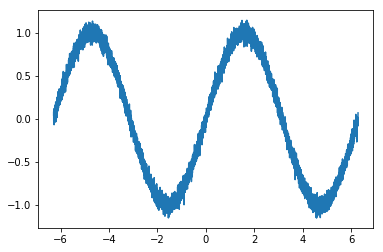

In [74]:
#plot data_2
import matplotlib.pyplot as plt 
x = np.array(df_2[0])
y = np.array(df_2[1])
plt.plot(x,y)

## 3.3 load the tips dataset from seaborn

In [103]:
import seaborn as sns

#load tips dataset
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


## 3.4 plot pairplot, jointplot, catplot, displot, and HeatMap for the above dataset and give your comments on each plot

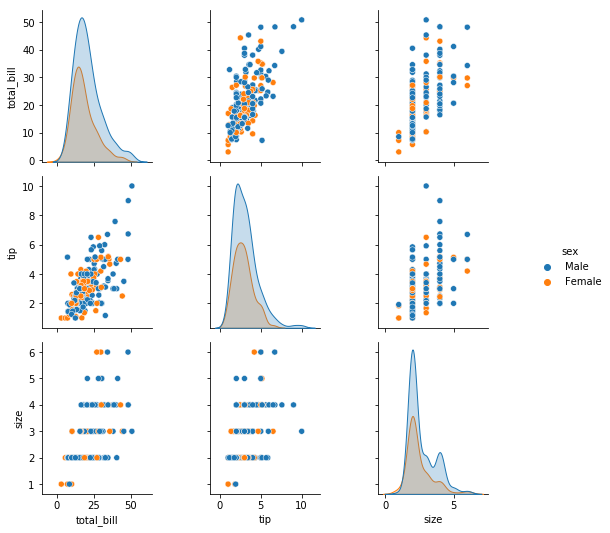

In [174]:
#pairplot
sns.pairplot(data=tips, hue="sex")

There seems to be a linear relationship between total_bill and tip. More men seem to be contributing to high amount of total_bill over women. 

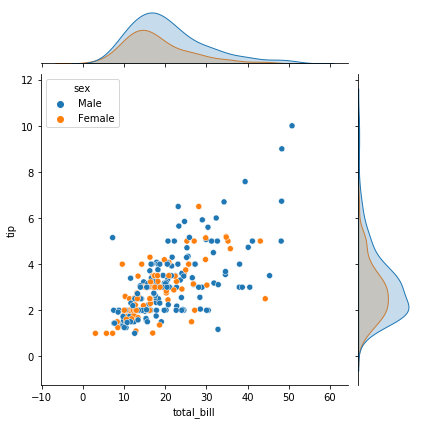

In [115]:
#jointplot
sns.jointplot(data=tips, x="total_bill", y="tip", hue="sex")


A linear relationship can be observed between tip and total_bill. Sex could be a contributing factor in determining the tip

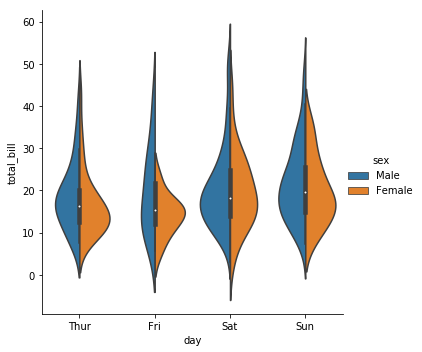

In [183]:
#catplot
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="sex", split=True)

The distribution between genders on friday has the largest difference. The median total_bill is slightly high during weekends(Sat and Sun).

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


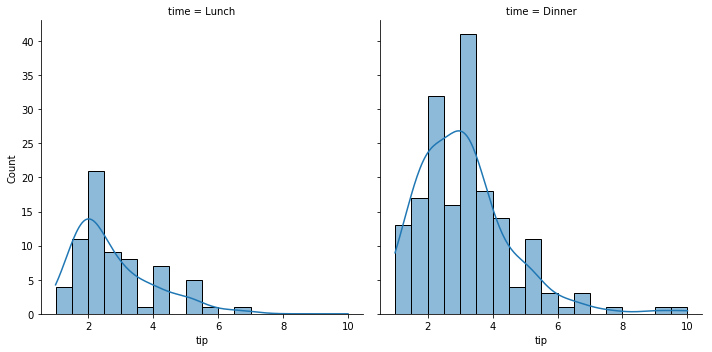

In [107]:
#displot
sns.displot(data=tips,x="tip",col="time",kde=True)

Although maxinum value of tip is with in $8 for both lunch and dinner, the number of tips seems to high during dinner.

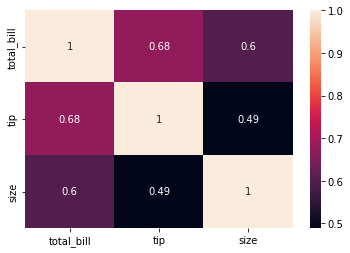

In [119]:
#heatmap
corr = tips.corr()
sns.heatmap(corr,annot = True)

There seems a positive correlation among total_bill and tip, total_bill and size and also the size and tip. There are no negetaive correlations.